# Problem 1: Split the data

Apply the train-test split to the dataset:


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/life_expectancy.csv')

data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# Problem 2: Single variable linear regression model

Encoding the non-numeric variables:

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_train['Country'] = label_encoder.fit_transform(data_train['Country'])

data_train

,Country,Year,"Mean Years of Schooling, female (years)","Share of seats in parliament, male (% held by men)",Mean Years of Schooling (years),Inequality in income,Carbon dioxide emissions per capita (production) (tonnes),"Expected Years of Schooling, male (years)",Expected Years of Schooling (years),"Labour force participation rate, female (% ages 15 and older)",...,Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)",Live births Surviving to Age 1 (thousands),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
3565,109,2004,6.466433,94.285714,7.104950,NaN,2.540806,13.108130,13.018430,39.592,...,27.103,103.6,8.533,4.822,3.711,6.815,72.4841,19.575,-3.288,-2.626
2572,86,2019,10.041390,84.615385,10.398790,17.91185,2.548582,10.430060,10.560510,13.996,...,29.651,104.9,33.639,19.768,13.871,3.148,76.0440,238.540,28.963,2.711
1253,42,2009,10.929200,87.500000,11.261940,NaN,7.712167,14.670280,14.573040,56.427,...,30.271,106.5,7.121,3.902,3.219,6.443,79.4006,13.543,12.173,11.014
1657,59,2002,11.862772,63.500000,11.867462,NaN,12.479423,17.265989,18.066771,56.857,...,29.711,105.1,49.412,23.948,25.464,9.506,78.2698,55.385,5.250,1.010
831,32,2015,2.940000,87.500000,4.230000,49.19459,0.039958,8.625326,7.335163,63.627,...,28.953,103.3,58.936,31.570,27.366,12.150,52.7930,187.273,-63.213,-13.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,120,2000,11.323803,67.111111,11.785500,NaN,10.742370,16.762430,16.565460,54.166,...,30.284,104.8,140.526,68.753,71.773,8.844,78.1222,204.374,21.650,1.363
5191,178,2004,11.261122,94.666667,11.228851,NaN,6.573045,14.058330,14.351120,52.706,...,25.737,106.1,759.468,390.097,369.372,16.065,68.4016,423.476,-11.530,-0.244
5226,182,2007,8.364800,87.692308,8.183540,NaN,1.785098,14.287946,14.950360,53.526,...,27.207,105.0,30.834,16.052,14.781,9.249,76.4981,48.285,-10.752,-3.225
5390,184,2014,NaN,100.000000,6.793013,19.68257,0.583164,11.445756,11.220369,60.416,...,28.749,107.0,1.635,0.945,0.690,6.048,69.4645,8.694,-0.785,-2.903


Identify the variables with the strongest relationship with the target variable `Life Expectancy at Birth, both sexes (years)` using the Pearson correlation coefficient:

In [17]:
correlation = data_train.corr()
correlation['Life Expectancy at Birth, both sexes (years)'].sort_values(ascending=False)

Life Expectancy at Birth, both sexes (years)                                       1.000000
Human Development Index (value)                                                    0.918341
Expected Years of Schooling, female (years)                                        0.814086
Expected Years of Schooling (years)                                                0.799646
Median Age, as of 1 July (years)                                                   0.797353
Expected Years of Schooling, male (years)                                          0.778834
Mean Years of Schooling, female (years)                                            0.749029
Mean Years of Schooling (years)                                                    0.743001
Mean Years of Schooling, male (years)                                              0.728092
Population with at least some secondary education, female (% ages 25 and older)    0.691909
Population with at least some secondary education, male (% ages 25 and older)   

Construct a linear regression model using the variable with the strongest relationship with the target variable:

In [18]:
from sklearn.linear_model import LinearRegression

X_train = data_train[['Human Development Index (value)']]
y_train = data_train['Life Expectancy at Birth, both sexes (years)']

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Plot the linear regression model:

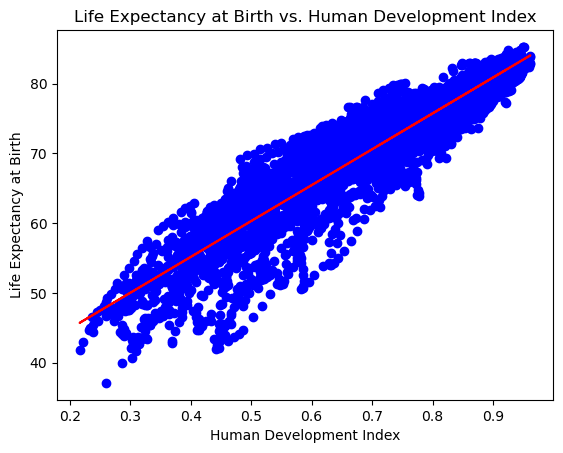

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Life Expectancy at Birth vs. Human Development Index')
plt.xlabel('Human Development Index')
plt.ylabel('Life Expectancy at Birth')
plt.show()